In [1]:
%pylab
%matplotlib inline

import pandas as pd
import datetime as dt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [14]:
path = r'C:\Users\ghage\Documents\Diabetes\myLife'
filename1 = r'\report-010420-310321\010420-310321.csv'
filename2 = r'\report-180520-170521\180520-170521-bg-bolus-carbs2.csv'

In [111]:
df1 = pd.read_csv(path + filename1, usecols=[1, 2, 3, 4], parse_dates=[[0, 1]], dayfirst=True)
df2 = pd.read_csv(path + filename2, usecols=[1, 2, 3, 4], parse_dates=[[0, 1]], dayfirst=True)

In [115]:
df = pd.concat([df1, df2]).drop_duplicates()

In [117]:
df = df.sort_values('Date_Time')

In [118]:
df

,Date_Time,Event,Value
2894,2020-04-23 12:00:00,Bolus,5.0
2893,2020-04-23 12:00:00,Blood glucose,23.9
2891,2020-04-23 13:55:00,Blood glucose,16.1
2892,2020-04-23 13:55:00,Carbohydrates,52.0
2890,2020-04-23 13:55:00,Bolus,2.5
...,...,...,...
3,2021-05-17 09:29:00,Bolus,3.0
5,2021-05-17 09:29:00,Carbohydrates,45.0
1,2021-05-17 13:49:00,Blood glucose,2.8
0,2021-05-17 13:49:00,Bolus,3.5


In [119]:
df_split = df.pivot_table(index=['Date_Time'], columns='Event', values='Value', aggfunc='first')

In [122]:
df_split

Event,Blood glucose,Bolus,Carbohydrates
Date_Time,,,
2020-04-23 12:00:00,23.9,5.0,NaN
2020-04-23 13:55:00,16.1,2.5,52.0
2020-04-23 16:02:00,23.7,6.0,65.0
2020-04-23 19:54:00,15.3,5.5,70.0
2020-04-24 08:20:00,19.7,7.5,85.0
...,...,...,...
2021-05-16 14:35:00,5.3,6.5,80.0
2021-05-16 19:24:00,4.0,6.0,75.0
2021-05-16 19:44:00,4.1,6.0,150.0


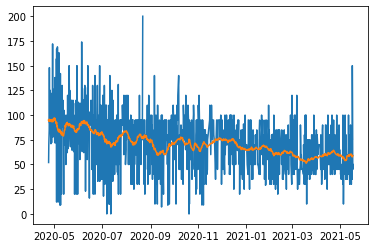

In [124]:
plot(df_split['Carbohydrates'])
plot(df_split['Carbohydrates'].rolling(14*3, min_periods=1, center=True, closed='neither').mean())

In [96]:
s = '2020-04-03 03:14:15'
pd.to_datetime(s, format='%Y-%d-%m %H:%M:%S')

Timestamp('2020-03-04 03:14:15')

In [125]:
mylife_df = df_split
%store mylife_df

Stored 'mylife_df' (DataFrame)
